### Import required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import tabula
from sklearn.ensemble import IsolationForest

### Loading in data

Seeing if I can read the pdf files with `tabula`.  I was able to get the exercise 2 table but not exercise 1.  

Exercise 1 I just hard coded/ hand typed the values which can be a problem with human error and it is slower to do it manually. For this problem there was no "need" to enter the values in because the exercise did not need coding to complete it.  

In [2]:
tabula.read_pdf('./MicroAI_Data Analyst Scientist Test_Questions.pdf', pages=1, multiple_tables= False)

The output file is empty.


[]

In [28]:
data = [['Houston_Rockets','Dallas_Mavericks',0],
       ['Houston_Rockets','Boston_Celtics',0],
       ['Houston_Rockets','Toronto_Raptors',1],
       ['Houston_Rockets','Denver_Nuggets',0],
       ['Dallas_Mavericks','Boston_Celtics',0],
       ['Dallas_Mavericks','Toronto_Raptors',0],
       ['Dallas_Mavericks','Denver_Nuggets',1],
       ['Boston_Celtics','Toronto_Raptors',0],
       ['Boston_Celtics','Denver_Nuggets',1],
       ['Toronto_Raptors','Denver_Nuggets',0],
        
        ['Houston_Rockets','Dallas_Mavericks',1],
       ['Houston_Rockets','Boston_Celtics',1],
       ['Houston_Rockets','Toronto_Raptors',0],
       ['Houston_Rockets','Denver_Nuggets',1],
       ['Dallas_Mavericks','Boston_Celtics',0],
       ['Dallas_Mavericks','Toronto_Raptors',1],
       ['Dallas_Mavericks','Denver_Nuggets',0],
       ['Boston_Celtics','Toronto_Raptors',1],
       ['Boston_Celtics','Denver_Nuggets',0],
       ['Toronto_Raptors','Denver_Nuggets',1],
        
        ['Houston_Rockets','Dallas_Mavericks',1],
       ['Houston_Rockets','Boston_Celtics',1],
       ['Houston_Rockets','Toronto_Raptors',1],
       ['Houston_Rockets','Denver_Nuggets',1],
       ['Dallas_Mavericks','Boston_Celtics',0],
       ['Dallas_Mavericks','Toronto_Raptors',1],
       ['Dallas_Mavericks','Denver_Nuggets',0],
       ['Boston_Celtics','Toronto_Raptors',1],
       ['Boston_Celtics','Denver_Nuggets',0],
       ['Toronto_Raptors','Denver_Nuggets',1],
        
        ['Houston_Rockets','Dallas_Mavericks',0],
       ['Houston_Rockets','Boston_Celtics',1],
       ['Houston_Rockets','Toronto_Raptors',1],
       ['Houston_Rockets','Denver_Nuggets',0],
       ['Dallas_Mavericks','Boston_Celtics',1],
       ['Dallas_Mavericks','Toronto_Raptors',1],
       ['Dallas_Mavericks','Denver_Nuggets',0],
       ['Boston_Celtics','Toronto_Raptors',1],
       ['Boston_Celtics','Denver_Nuggets',0],
       ['Toronto_Raptors','Denver_Nuggets',1],
        
        ['Houston_Rockets','Dallas_Mavericks',1],
       ['Houston_Rockets','Boston_Celtics',1],
       ['Houston_Rockets','Toronto_Raptors',0],
       ['Houston_Rockets','Denver_Nuggets',0],
       ['Dallas_Mavericks','Boston_Celtics',0],
       ['Dallas_Mavericks','Toronto_Raptors',0],
       ['Dallas_Mavericks','Denver_Nuggets',0],
       ['Boston_Celtics','Toronto_Raptors',0],
       ['Boston_Celtics','Denver_Nuggets',0],
       ['Toronto_Raptors','Denver_Nuggets',1],
        
]
nba_games = pd.DataFrame(data, columns=['team_1', 'team_2','win'])
#for the win column 0=team_1 winning and 1=team_2 winning

In [4]:
table2 = tabula.read_pdf('./MicroAI_Data Analyst Scientist Test_Questions.pdf', pages=2)

In [5]:
tabula.convert_into('./MicroAI_Data Analyst Scientist Test_Questions.pdf', 'table2.csv', pages=2)

In [6]:
table2 = pd.read_csv('./table2.csv')

# Exercise 1:
**Below is a table of historic results of basketball games. 1 represents a win, and -1
represents a loss for the team labeled in that row.
`nba_games`
Tomorrow there is a game between the Denver Nuggets and the Dallas Mavericks.
What is the probability that Denver will win?**

In [8]:
mavs_nug = nba_games[(nba_games.team_1 == 'Dallas_Mavericks') & (nba_games.team_2 == 'Denver_Nuggets')]
mavs_nug

,team_1,team_2,win
6,Dallas_Mavericks,Denver_Nuggets,1
16,Dallas_Mavericks,Denver_Nuggets,0
26,Dallas_Mavericks,Denver_Nuggets,0
36,Dallas_Mavericks,Denver_Nuggets,0
46,Dallas_Mavericks,Denver_Nuggets,0


In [9]:
mavs_nug.win.value_counts(normalize=True)

0    0.8
1    0.2
Name: win, dtype: float64

Answer: From the information that we are given, I would calculate the probability of a team winning from the frequency of the two teams prior game history and if even I would use overall record to break the tie.  There is a limited amount of features given in this dataset for predicting outcomes and background information.  More information such as home/ away games or if these games are occuring chronologically can affect the prediction.  So without making any false assumptions about the data, I looked at all instances where the Dallas_Mavericks and Denver_Nuggets competed against eachother and took the probability that Denver won over all games they played against eachother.  Denver Nuggets won one out of the five games they played against eachother so the probability that Denver will win against Dallas in their next game will be 0.2 or 20%.

# Exercise 2
**Below is a table of widths and heights (in pixels) belonging to different figures:**

**`table2`**

**Using a machine learning algorithm, can you determine if a figure with width 30 and
height 22 is considered an anomaly in the above data set?** 

There are multiple ways to interpret this question since the criteria for considering the sample figure anomalous was not provided.  If the question is describing a data set that may contain multiple clusters (e.g., manufacturing several parts with different specifications but the data for all part is compiled), then I have to look at the data for clustering and determine if the 30W x 22H figure is within one of the clusters. If the question is describing the data within the table as considered to be a single data cluster (e.g., one part with some variation allowed), then I have to analyze if the figure  is conforming to the data set in it's entirety without considering the data clusters.  Or possibly, if the sample part is no more anomalous to the "average" than any of the individual data points within the given data table, then it would not be considered statistically different.

If clustering is not considered, a simple evaluation of each measure and the ratio of the measures should sufficiently determine if the sample figure is anomalous to the data table.  Is the Width within the range of the data set?  Yes, but it is an outlier.  Is the Height within the range of the data set?  No, it is outside/below the range of the data set.  Is the W:H ratio statistically different than the W:H ratio of the rest of the data.  No, ... **(Shown in EDA)**

Next I looked at the data to determine if there was any clustering such that the sample could be within the universe of the data but still anomalous to the clusters.  I determined that the data table does contain clustering such that a comparative part could be between the clusters but still anomalous to both.
The method I chose to use is Unsupervised learning route because we do not have the target variable.  The algorithms I initally thought of using were One Class SVM, LOF, and IsolationForest for anomaly detection.  According to sklearn documentation one-class SVM is applied for novelity detection which assumes that all data that is fitted on the model is considered good which was not stated in the question, so I decided to go with IsolationForest which is used more with outlier detection. **(Shown in Model Building)**

### EDA

Because there is no time variable, there is no anomalies we can detect from trends.  We will be looking for collective anomalies, with respect to the entire data set.  EDA was performed for curiousity reasons and for gaining a better insight on the data that was provided. 

In [10]:
table2.describe()

,Width,Height
count,25.000000,25.000000
mean,25.440000,26.240000
std,2.022375,2.203785
min,21.000000,24.000000
25%,24.000000,25.000000
50%,25.000000,25.000000
75%,27.000000,29.000000
max,30.000000,30.000000


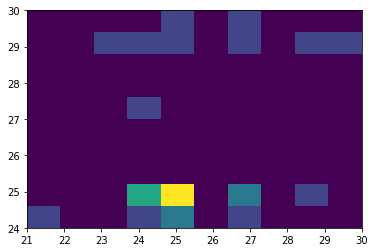

In [11]:
plt.hist2d(table2.Width, table2.Height);

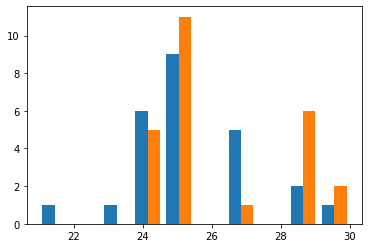

In [12]:
plt.hist(table2);

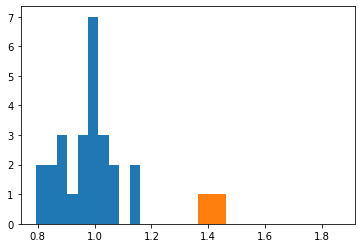

In [22]:
table2B = table2.copy()
sample = [[30, 22, (30/22)]]
sample_df = pd.DataFrame(sample, columns=['Width','Height','WH_ratio'])
# table2B = table2B.append(sample, ignore_index = True)
table2B['WH_ratio'] = table2B.Width / table2B.Height
plt.hist(table2B.WH_ratio),plt.hist(sample_df.WH_ratio);

By observing a width/height ratio we can see that the 30H,22W = 1.36 is outside of distribution and can counted as an outlier.

## Model Building

In [23]:
model = IsolationForest() #instantiating the model
model.fit(table2) #fitting the model

IsolationForest()

In [24]:
table2A = table2.copy() #creating a copy so I can refer back to the original if need be
table2A['anomaly_scores'] = model.decision_function(table2) #creates a colummn to view the averaged anomaly scores in the copy 
table2A['anomaly'] = model.predict(table2) #creating a column to view the predictions of the model
table2A

,Width,Height,anomaly_scores,anomaly
0,25,24,0.043634,1
1,25,25,0.117026,1
2,25,25,0.117026,1
3,21,24,-0.173035,-1
4,24,24,0.010743,1
5,30,29,-0.119905,-1
6,25,25,0.117026,1
7,25,25,0.117026,1
8,27,29,-0.003126,-1
9,25,29,0.017008,1


In [25]:
model.predict([[30,22]]) #predicting on the exercise questions point

array([-1])

**My model predicted that this unit with a width of 30 and height of 22 would be detected as an anomaly.**  

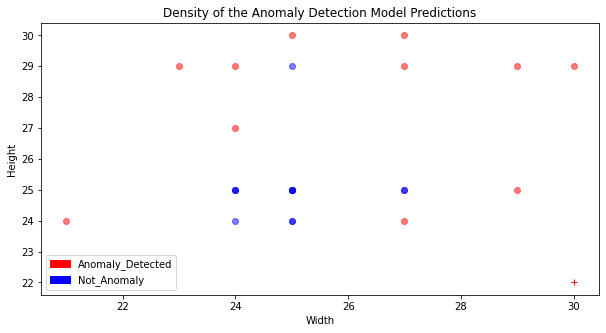

In [26]:
Exercise_Point = [30,22] # width, height
if model.predict([Exercise_Point])==-1: 
    exercise_color = 'red'
else:
    exercise_color = 'blue'

anomaly_patch = mpatches.Patch(color='red', label='Anomaly_Detected')
not_patch = mpatches.Patch(color='blue', label='Not_Anomaly')

plt.figure(figsize=[10,5])
plt.scatter(table2A[table2A['anomaly']==-1]['Width'], table2A[table2A['anomaly']==-1]['Height'],c='r',alpha=0.5)
plt.scatter(table2A[table2A['anomaly']==1]['Width'], table2A[table2A['anomaly']==1]['Height'],c='b',alpha=0.5)
plt.plot(Exercise_Point[0], Exercise_Point[1],'+',c=exercise_color)
plt.legend(handles=[anomaly_patch,not_patch], loc='lower left')
plt.title('Density of the Anomaly Detection Model Predictions')
plt.xlabel('Width')
plt.ylabel('Height');

The results from the model and the questions point can be viewed in the above graph.  The  exercise sample is represented as a "+".